In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
poverty_csv = pd.read_csv("Poverty_Total_Clean_3.csv")
poverty_df = pd.DataFrame(poverty_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
poverty_df = poverty_df[["county","Poverty_Rate"]]
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})
poverty_df.head()

,county,Poverty_Rate
0,"Autauga, AL",2.579372
1,"Baldwin, AL",1.747980
2,"Barbour, AL",2.478209
3,"Bibb, AL",3.495913
4,"Blount, AL",2.880495


In [4]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [5]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Douglas, WA",70.3
1,"Franklin, GA",67.6
2,"Trousdale, TN",71.4
3,"Brantley, GA",78.3
4,"Franklin, NY",72.9


In [6]:
poverty_analysis = sample_home_ownership.merge(poverty_df, on="county")
poverty_analysis.head()

,county,HOR,Poverty_Rate
0,"Douglas, WA",70.3,2.376428
1,"Franklin, GA",67.6,3.930210
2,"Trousdale, TN",71.4,2.874297
3,"Brantley, GA",78.3,3.586267
4,"Franklin, NY",72.9,1.114379


In [7]:
len(poverty_analysis)

621

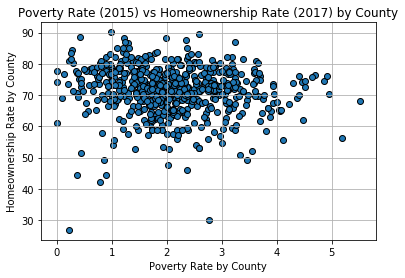

In [8]:
plt.scatter(poverty_analysis["Poverty_Rate"], poverty_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Poverty Rate (2015) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Poverty Rate by County")
plt.grid(True)
plt.savefig('Pictures/Poverty_rate_scatter.png')

In [9]:
x = poverty_analysis["Poverty_Rate"]
y = poverty_analysis["HOR"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HOR   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.014
Date:                Mon, 09 Sep 2019   Prob (F-statistic):            0.00829
Time:                        19:54:35   Log-Likelihood:                -2150.6
No. Observations:                 621   AIC:                             4305.
Df Residuals:                     619   BIC:                             4314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.3463      0.745     98.447      0.000      71.883      74.809
Poverty_Rate    -0.8564      0.323     -2.648      0.008      -1.491      -0.221
==============================================================================
Omnibus:                      159.420   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.415
Skew:                          -1.202   Prob(JB):                    7.28e-113
Kurtosis:                       6.766   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

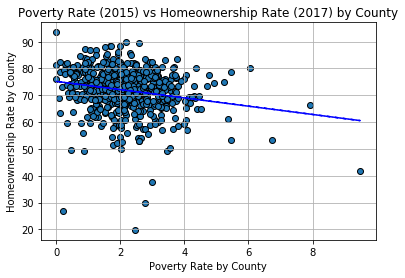

In [61]:
plt.scatter(poverty_analysis["Poverty_Rate"], poverty_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Poverty Rate (2015) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Poverty Rate by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Poverty_rate_regression.png')